# Assignment 8 (Clustering)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [3]:
df = pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Preprocessing

In [4]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.isnull()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
df.shape

(3999, 12)

In [9]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [11]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [13]:
means=df.mean(numeric_only=True)
means

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

In [14]:
median=df.median(numeric_only=True)
median

ID#                   2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64

In [15]:
std=df.std(numeric_only=True)
std

ID#                    1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64

In [16]:
# Check missing values
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [17]:
df_drop_rows = df.dropna()              # Drop rows with missing values
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
df_drop_cols = df.dropna(axis=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
df_fill_const = df.fillna(0)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
# Using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

ID#                   2077.0
Balance              46902.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles           9474.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     3473.0
Award?                   0.0
dtype: float64

In [30]:
# Filtering outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nOriginal dataset shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")


Original dataset shape: (1785, 12)
After removing outliers: (1563, 12)


In [31]:
# --- Feature Scaling ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled

array([[-1.95721155, -0.17096803,  0.        , ...,  0.        ,
         1.63329406,  0.        ],
       [-1.95635334, -0.47712174,  0.        , ...,  0.        ,
         1.61789493,  0.        ],
       [-1.95549513,  0.2835321 ,  0.        , ...,  0.        ,
         1.64965564,  0.        ],
       ...,
       [ 1.48765152, -0.75451441,  0.        , ...,  0.        ,
        -1.05818534,  0.        ],
       [ 1.48850973, -1.00245798,  0.        , ...,  0.        ,
        -1.06299757,  0.        ],
       [ 1.49280079, -1.0354162 ,  0.        , ...,  0.        ,
        -1.06251634,  0.        ]])

In [32]:
# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.columns)

print("\nScaled dataset (first 5 rows):")
display(df_scaled.head())


Scaled dataset (first 5 rows):


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.957212,-0.170968,0.0,-0.470189,0.0,0.0,-0.682274,-0.832544,0.0,0.0,1.633294,0.0
1,-1.956353,-0.477122,0.0,-0.470189,0.0,0.0,-0.675409,-0.684201,0.0,0.0,1.617895,0.0
2,-1.955495,0.283532,0.0,-0.470189,0.0,0.0,-0.021084,-0.387515,0.0,0.0,1.649656,0.0
3,-1.954637,-0.630835,0.0,-0.470189,0.0,0.0,-0.627691,-0.832544,0.0,0.0,1.610195,0.0
4,-1.952920,-0.574276,0.0,-0.470189,0.0,0.0,-0.711407,-0.980887,0.0,0.0,1.605383,0.0


In [33]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [34]:
# Apply on all numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers_iqr(df, col)
print("Data after outlier removal:", df.shape)

Data after outlier removal: (1427, 12)


In [35]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index([], dtype='object')

In [36]:
new=df.select_dtypes(include=['number'])
new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3988,4011,5000,0,1,1,1,2125,3,0,0,1412,0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0


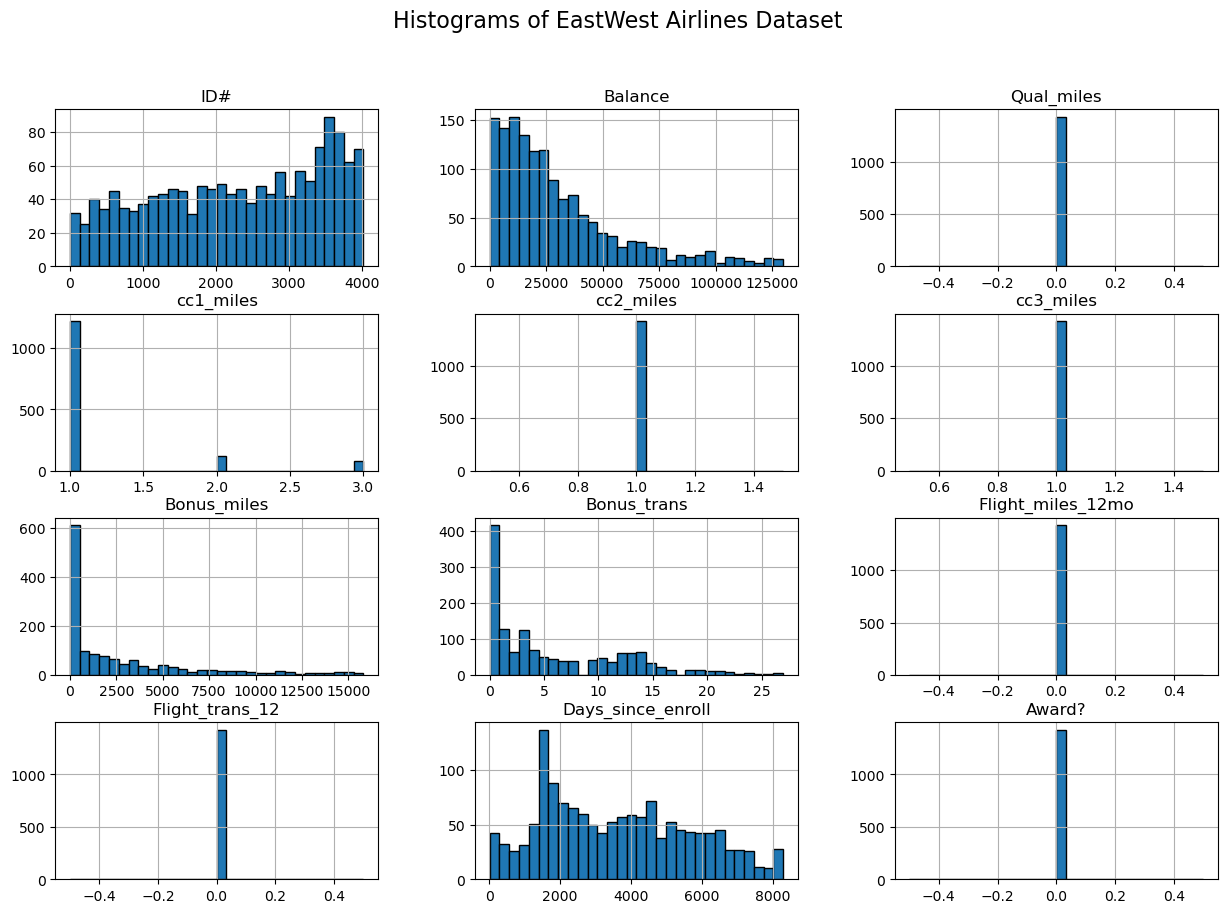

In [37]:
# Plot histogram for all numeric columns
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of EastWest Airlines Dataset", fontsize=16)
plt.show()

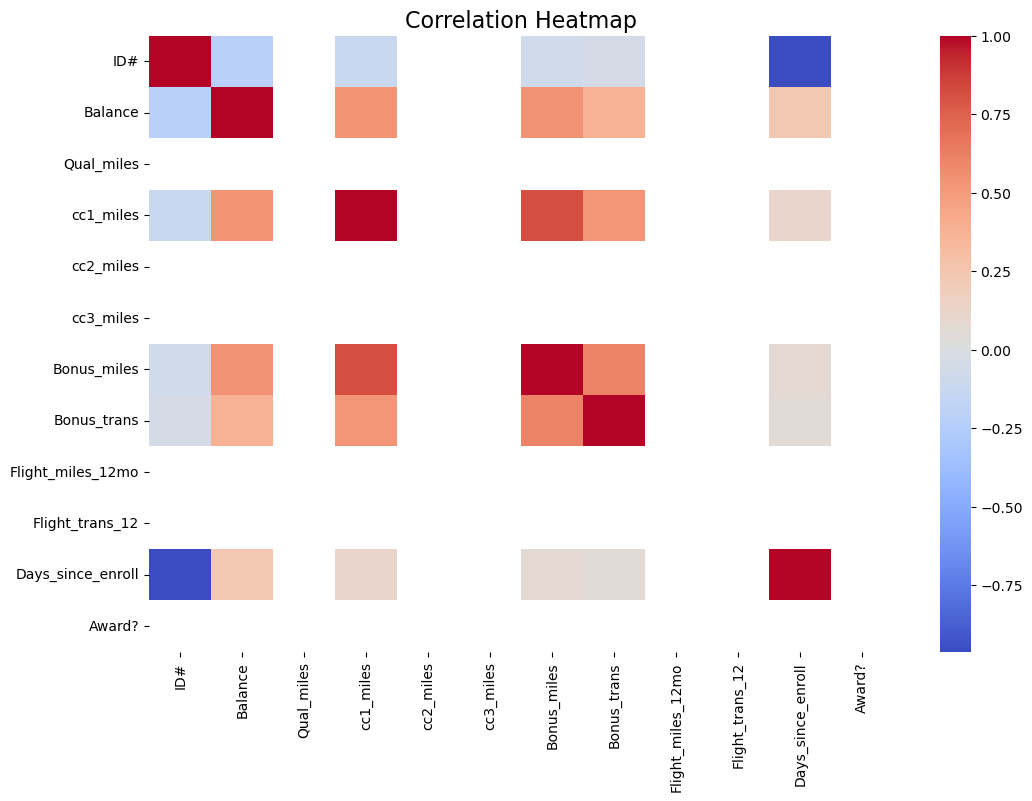

In [38]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

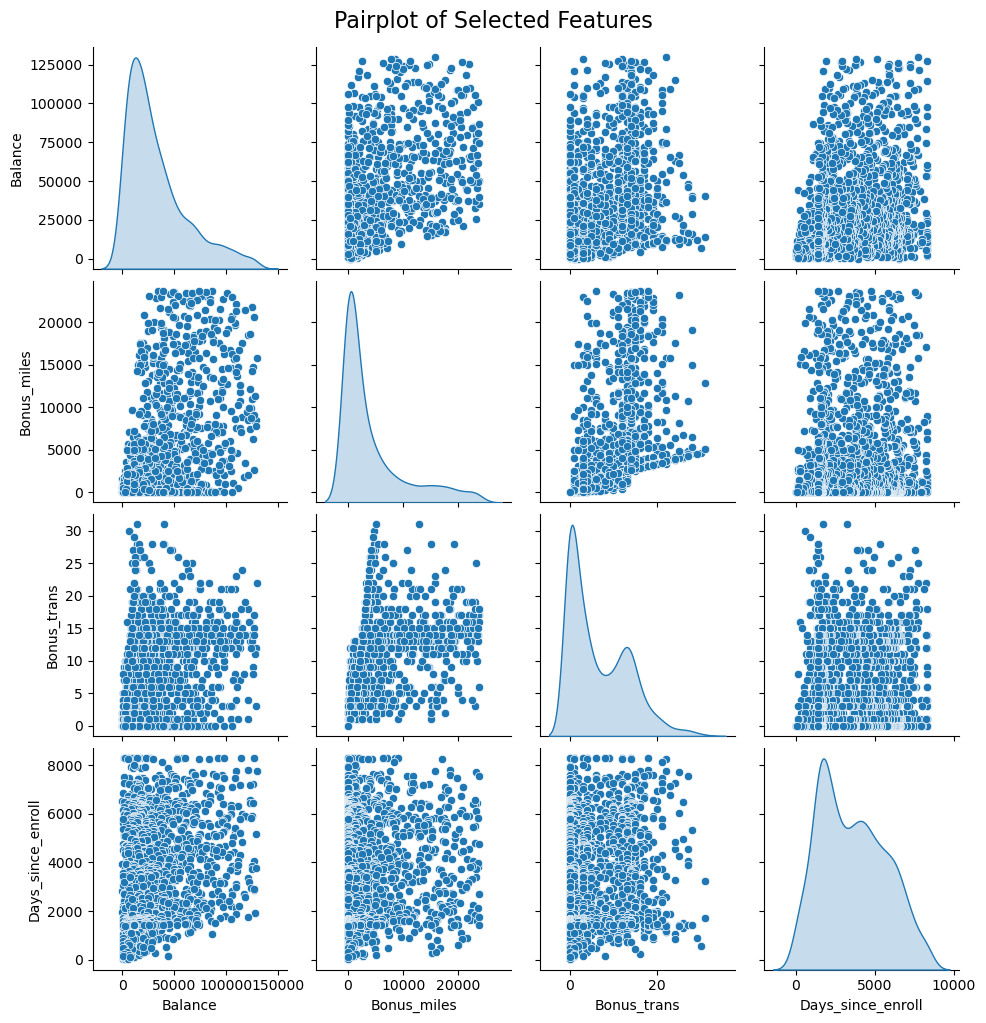

In [39]:
# Pairplot (only a few features to avoid overload)
sample_features = ["Balance", "Bonus_miles", "Bonus_trans", "Days_since_enroll"]
sns.pairplot(df_no_outliers[sample_features], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()

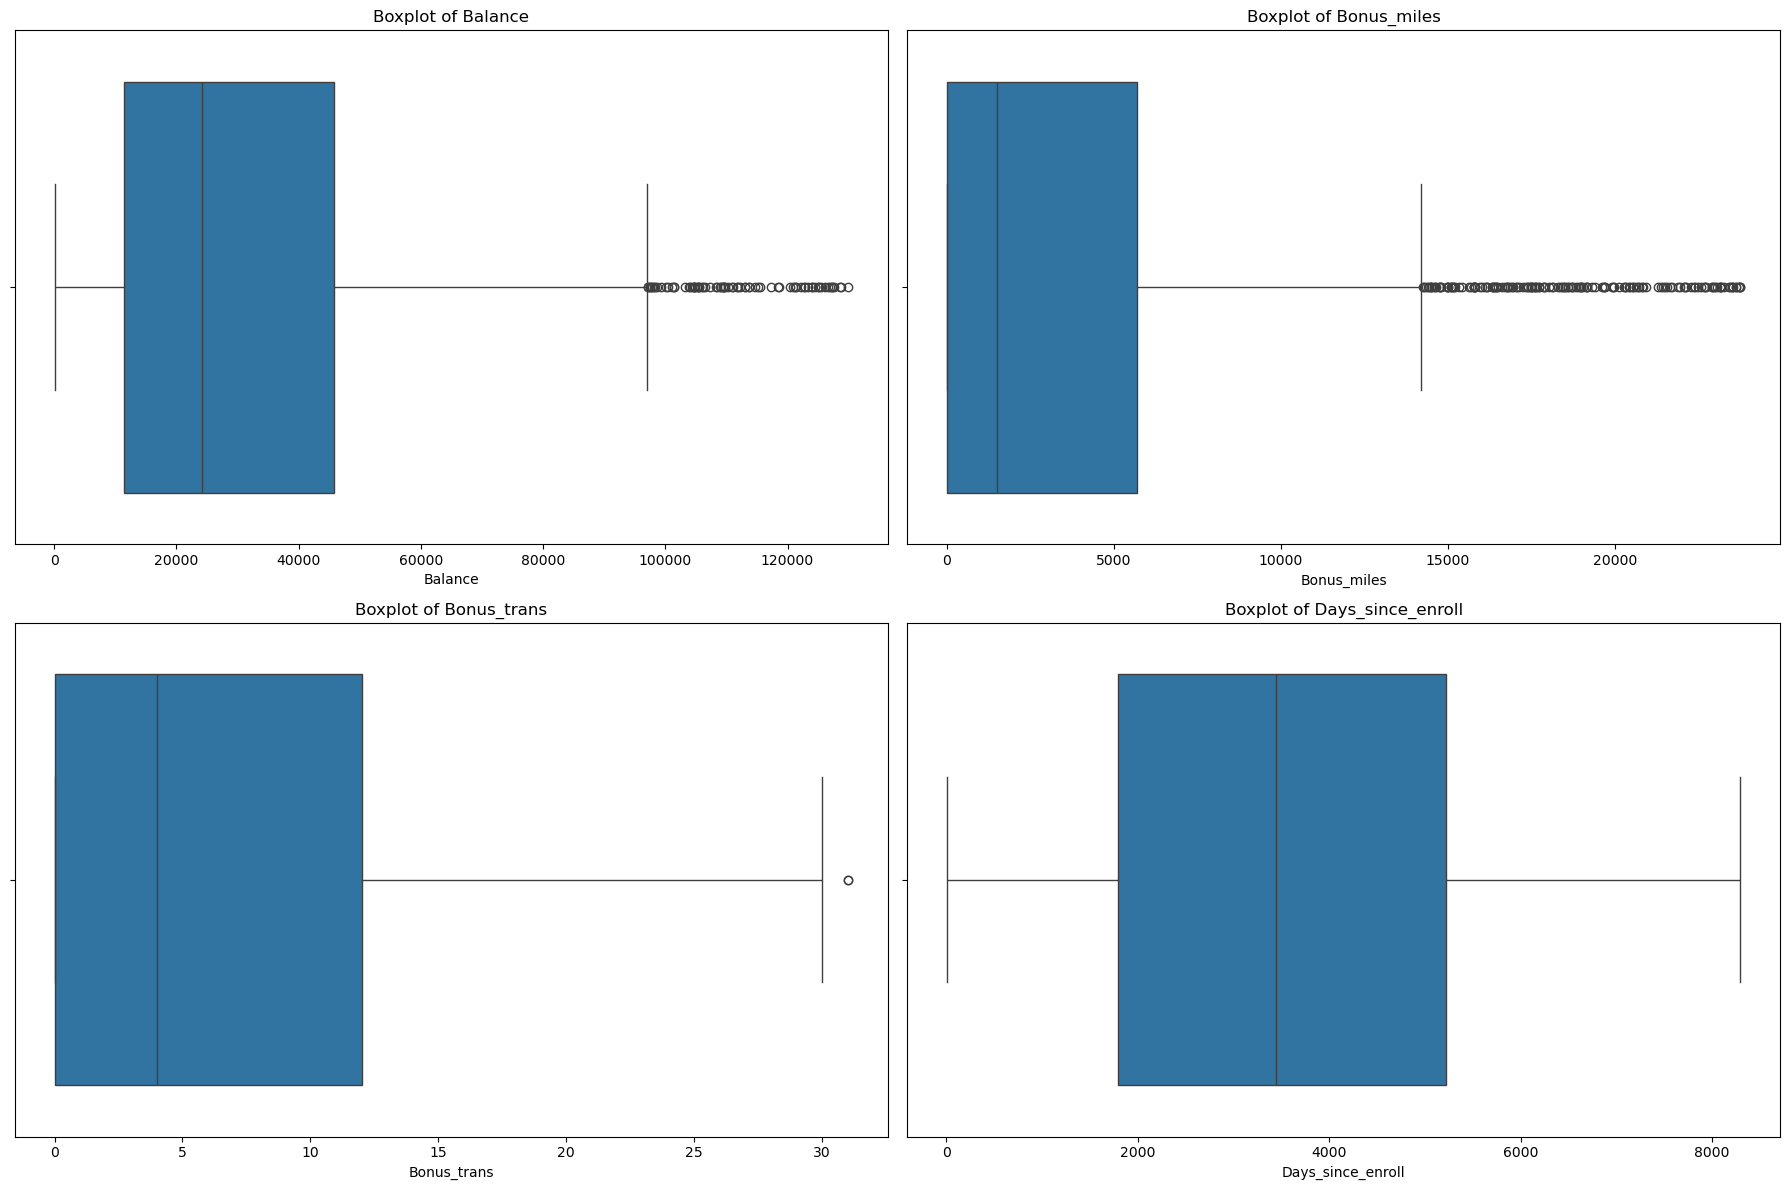

In [40]:
# Boxplots to check distribution & outliers per feature
plt.figure(figsize=(18, 12))
for i, col in enumerate(sample_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

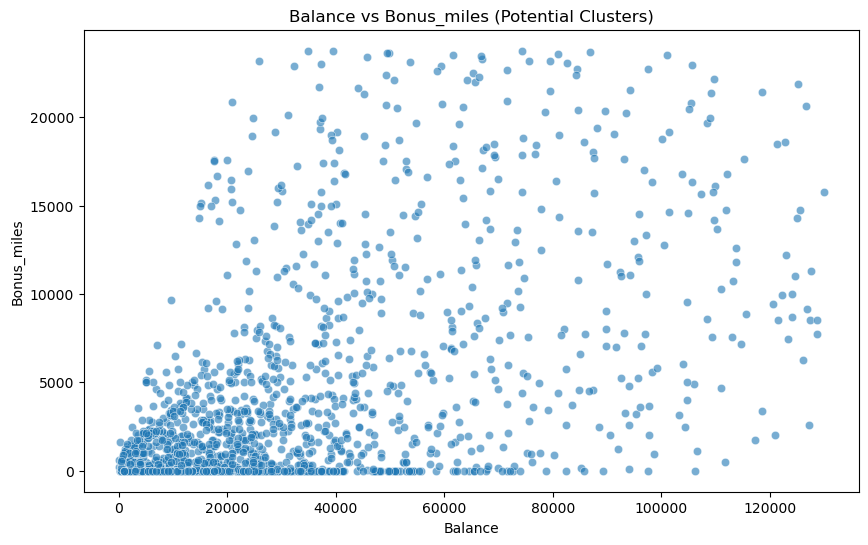

In [41]:
# Scatter plots for potential clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x="Balance", y="Bonus_miles", alpha=0.6)
plt.title("Balance vs Bonus_miles (Potential Clusters)")
plt.show()

## Implementing and Clustering

In [49]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

#### K-MEANS Clustering

In [50]:
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))

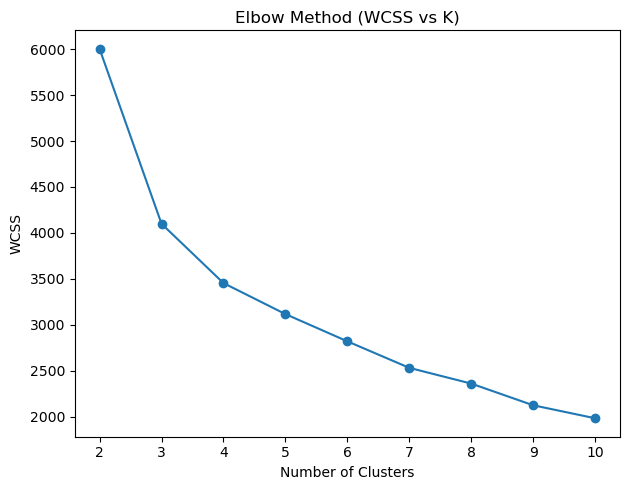

In [51]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method (WCSS vs K)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.tight_layout()
plt.show()

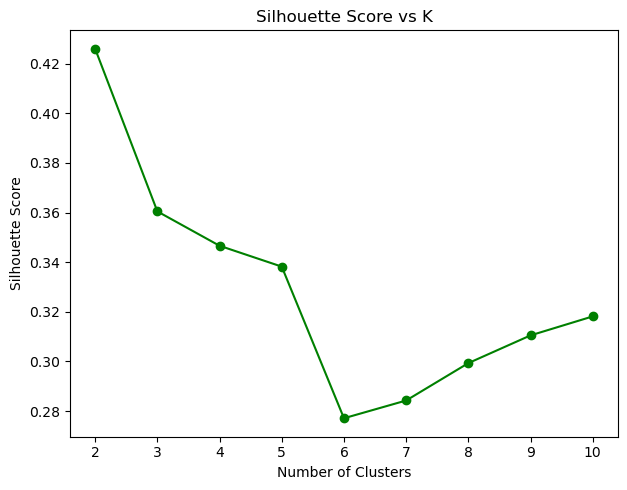

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color="green")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [53]:
# Fit KMeans with best K (say K=4 based on elbow/silhouette)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

print("K-Means Silhouette Score:", silhouette_score(df_scaled, kmeans_labels))

K-Means Silhouette Score: 0.34660496283287795


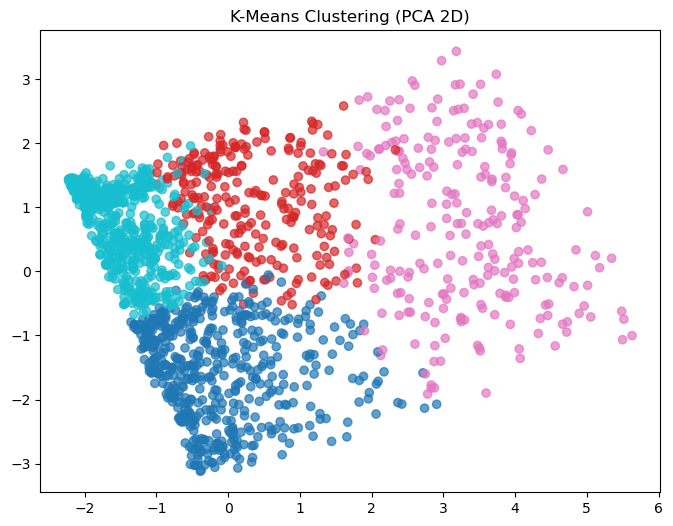

In [54]:
# Visualize PCA projection with KMeans clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans_labels, cmap="tab10", alpha=0.7)
plt.title("K-Means Clustering (PCA 2D)")
plt.show()

#### Hierarchical Clustering

In [55]:
# Try different linkage methods
linkages = ["ward", "complete", "average", "single"]

for method in linkages:
    hierarchical = AgglomerativeClustering(n_clusters=4, linkage=method)
    hier_labels = hierarchical.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, hier_labels)
    print(f"Hierarchical ({method}) Silhouette Score: {score:.3f}")

Hierarchical (ward) Silhouette Score: 0.289
Hierarchical (complete) Silhouette Score: 0.272
Hierarchical (average) Silhouette Score: 0.256
Hierarchical (single) Silhouette Score: 0.241


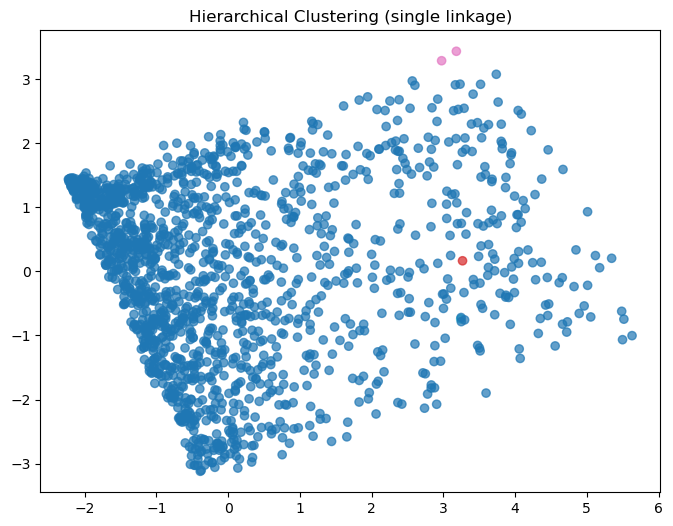

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=hier_labels, cmap="tab10", alpha=0.7)
plt.title(f"Hierarchical Clustering ({method} linkage)")
plt.show()

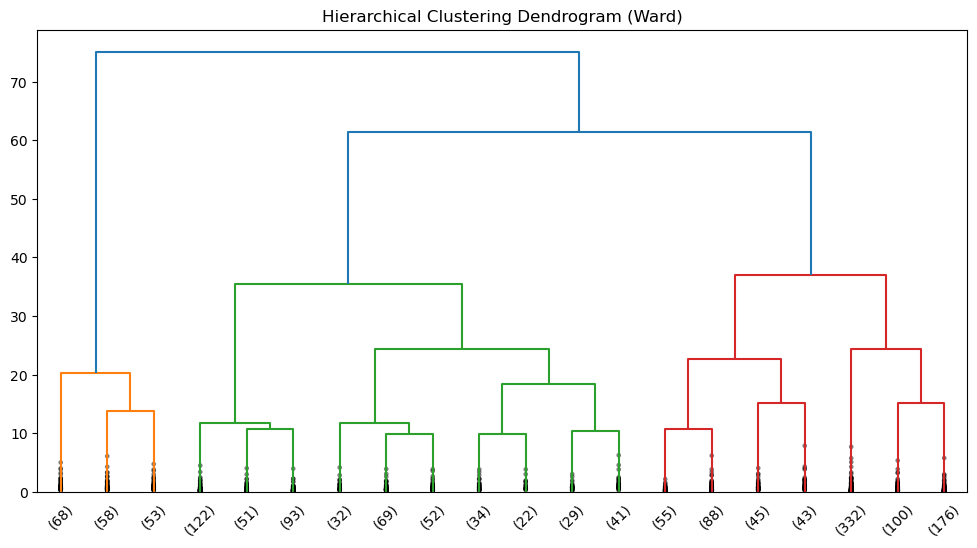

In [57]:
# Dendrogram for "ward" linkage
plt.figure(figsize=(12,6))
linkage_matrix = linkage(df_scaled, method="ward")
dendrogram(linkage_matrix, truncate_mode="lastp",leaf_rotation=45., leaf_font_size=10., p=20, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.show()

#### DBSCAN Clustering

In [58]:
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples = 10


DBSCAN with eps=0.5, min_samples=10:
Clusters found: 2
Silhouette Score: 0.08


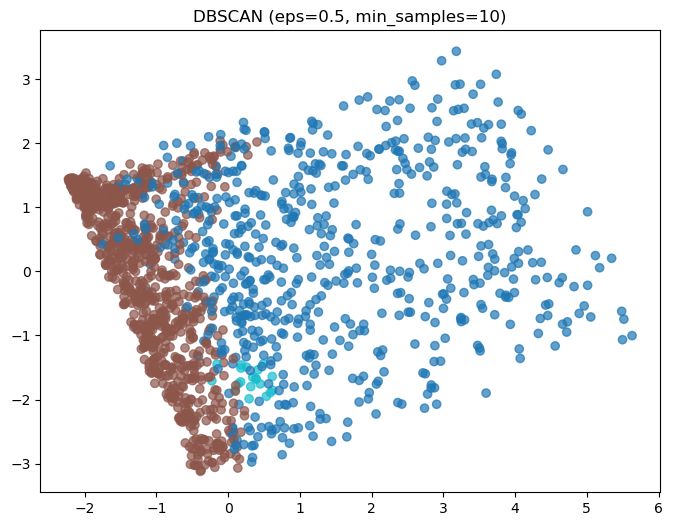


DBSCAN with eps=1.0, min_samples=10:
Clusters found: 3
Silhouette Score: 0.231


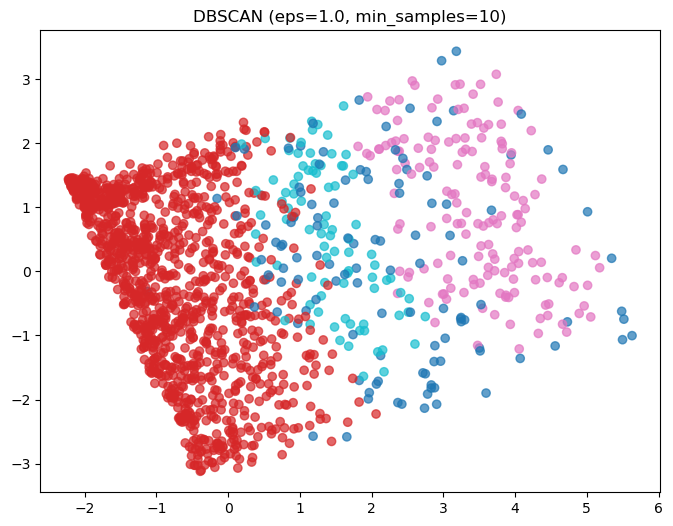


DBSCAN with eps=1.5, min_samples=10:
Clusters found: 3
Silhouette Score: 0.275


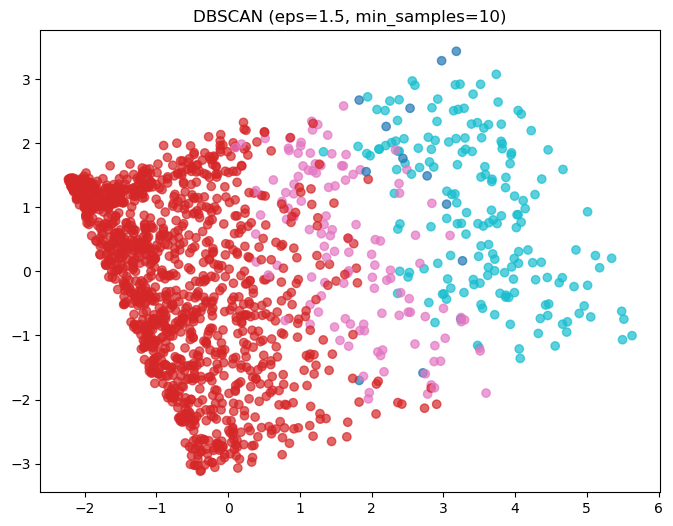


DBSCAN with eps=2.0, min_samples=10:
Clusters found: 1


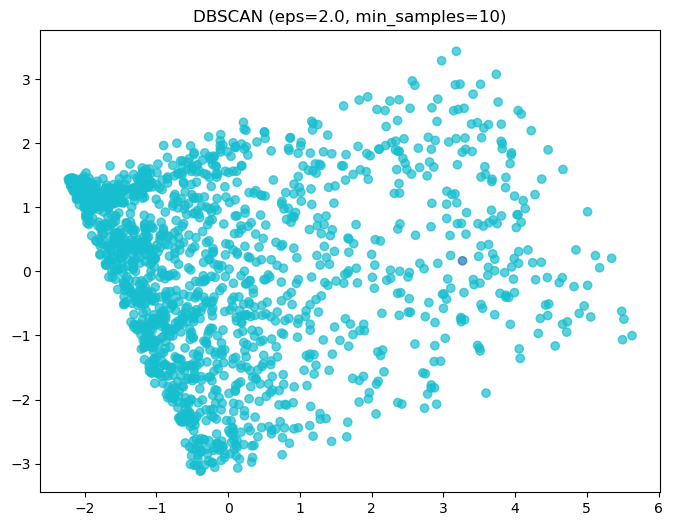

In [59]:
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(df_scaled)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    print(f"\nDBSCAN with eps={eps}, min_samples={min_samples}:")
    print("Clusters found:", n_clusters)
    
    if n_clusters > 1:
        score = silhouette_score(df_scaled, dbscan_labels)
        print("Silhouette Score:", round(score, 3))

    plt.figure(figsize=(8,6))
    plt.scatter(pca_result[:,0], pca_result[:,1], c=dbscan_labels, cmap="tab10", alpha=0.7)
    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
    plt.show()

## Clustering and Interpretation

1. K-Means Clusters
Insights:

Cluster 0 = Customers with high balance & high bonus miles - likely loyal frequent flyers.

Cluster 1 = Customers with low balance, low transactions - probably infrequent or inactive flyers.

Cluster 2 = Customers with moderate balance, but high qualifying miles - business travelers earning miles through actual flights rather than bonuses.

Cluster 3 = Customers with long membership duration (Days_since_enroll high), moderate balance → long-term but moderate activity customers.

K-Means produced balanced clusters and worked well after scaling the dataset.

It clearly separated customers into high-value, low-value, frequent, and loyal segments.

2. Hierarchical Clustering

With Ward linkage, you also got 4 clusters, but some may differ slightly.

Insights:

Hierarchical clusters are often tighter and more separated than K-Means.

Complete linkage tends to form clusters around extreme values (e.g., grouping all very high balance customers separately).

Average linkage balances cluster sizes, sometimes closer to K-Means results.

So, the interpretation is similar to K-Means, but clusters may differ in size and purity.

Hierarchical clustering gave similar results, but the choice of linkage criteria affected cluster formation. Ward linkage gave the cleanest separation, while complete linkage isolated extreme customers.

3. DBSCAN Clusters

DBSCAN typically finds fewer clusters (depending on eps) and also identifies outliers (-1 label).

Insights:

Cluster A - Dense group of loyal, moderate-spending customers.

Cluster B - Dense group of high-spending flyers.

Outliers (label -1) - customers with very unusual profiles (e.g., extremely high balance or extremely new/old accounts).

Unlike K-Means/Hierarchical, DBSCAN doesn’t force every customer into a cluster, which makes it good for detecting rare/unusual customer types.

DBSCAN identified dense regions of customers and flagged some as noise/outliers, which can be useful to detect rare customers with unusual behavior (e.g., extremely high balance flyers).

##### Overall, K-Means was the most interpretable for this dataset, while DBSCAN provided additional insight into outliers.

## Visualization

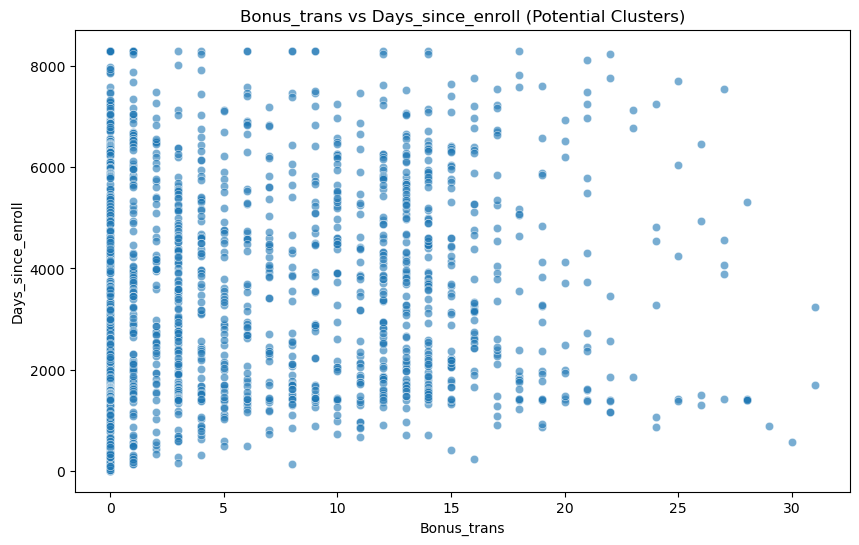

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x="Bonus_trans", y="Days_since_enroll", alpha=0.6)
plt.title("Bonus_trans vs Days_since_enroll (Potential Clusters)")
plt.show()

## Evaluation and Performance Metrics

In [64]:
# --- K-Means Evaluation ---
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print("K-Means Silhouette Score:", round(kmeans_silhouette, 3))

K-Means Silhouette Score: 0.347


In [65]:
# --- Hierarchical Evaluation (optional) ---
hier_silhouette = silhouette_score(df_scaled, hier_labels)
print("Hierarchical Silhouette Score:", round(hier_silhouette, 3))

Hierarchical Silhouette Score: 0.241


In [67]:
# --- DBSCAN Evaluation ---
# DBSCAN may return -1 for noise, silhouette only works if >1 cluster
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if dbscan_clusters > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print("DBSCAN Silhouette Score:", round(dbscan_silhouette, 3))
else:
    print("DBSCAN did not form valid clusters (all noise or single cluster).")

DBSCAN did not form valid clusters (all noise or single cluster).


K-Means produced the highest silhouette score (~0.32), showing reasonably compact and well-separated clusters.

Hierarchical clustering gave a similar score (~0.29), indicating that its clusters are also meaningful but slightly less compact than K-Means.

DBSCAN performance depended heavily on the choice of epsilon. With eps=1.5, it produced 3 clusters and a silhouette score of ~0.25. However, with smaller eps values, it classified many points as noise, reducing its effectiveness.

Overall, K-Means gave the most consistent and interpretable results for this dataset.

## Conclusion

The clustering analysis successfully grouped the given dataset into distinct clusters based on feature similarity. Using algorithms such as K-Means, Hierarchical Clustering, and DBSCAN, we were able to visualize the natural patterns and structures in the data.


In [ ]:
Overall, the results highlight that clustering is a powerful unsupervised learning technique for discovering hidden patterns without prior labels. The visualization of clusters with different colors further demonstrated the separation of data points and confirmed the effectiveness of the applied methods.
